In [1]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import pylab
import time
import scipy
from scipy.interpolate import interp1d, interp2d

In [2]:
import tooFab
#Matplotlib's default cycle of colors
t10_cmap = plt.get_cmap("tab10")

<h4>Define some particular variables</h4>

In [3]:
#strings for filenames
uuid          = '13198e38-e56f-4c94-8514-cef204f27ac5'
datfileprefix = '../Output/'+uuid
plotprefix    = uuid
#values of general use
Area_deg = 15000  #15000 deg^2
fsky   = Area_deg * (pi/180.)**2 / (4*pi)

<h1>Read data files</h1>

In [4]:
file_Cl       = datfileprefix+'_Clgal.dat'
file_CovCl    = datfileprefix+'_Cov_Clgal.dat'

In [5]:
# Read data files
# Clgal
dataCl = np.loadtxt(file_Cl,dtype='float')
l_Cl = dataCl[:,0] ; z_Cl = dataCl[:,1]
Cl_shot = dataCl[:,2] ; Cl_1h = dataCl[:,3] ; Cl_2h = dataCl[:,4] 
Cl_clust_vec = Cl_2h + Cl_1h #+ clshot
# Fullsky Covariance(Clgal)
dataCovCl = np.loadtxt(file_CovCl,dtype='float')
l1_CovCl = dataCovCl[:,0] ; z1_CovCl = dataCovCl[:,1]
l2_CovCl = dataCovCl[:,2] ; z2_CovCl = dataCovCl[:,3]
CovCl_G_vec = dataCovCl[:,4] ; CovCl_SSC_vec = dataCovCl[:,5]
CovCl_1h_vec = dataCovCl[:,6] ; CovCl_1hshot3g_vec = dataCovCl[:,7]
CovCl_1hshot2g_vec = dataCovCl[:,8] ; CovCl_1hshot1g_vec = dataCovCl[:,9] #Remarks: shot-noise terms are killed by shot-noise substraction, cf arXiv:1711.07372
CovCl_2h1p3_vec = dataCovCl[:,10] ; CovCl_3hbase0_vec = dataCovCl[:,11]
CovCl_4h3rd_vec = dataCovCl[:,12] ; CovCl_Braid_vec = dataCovCl[:,13]

In [6]:
z = np.unique(z_Cl) ; nz = np.size(z) ; zmin = z.min() ; zmax = 2.
ell = np.unique(l_Cl) ; nl = np.size(ell) ; lmin = ell.min() ; lmax = 50000

zcenter = np.zeros(nz)
zcenter[:-1] = (z[1:]+z[:-1])/2
zcenter[-1] = (zmax+z[-1])/2
print(nz,z,zcenter)
print(nl,ell)

10 [0.1   0.198 0.267 0.33  0.393 0.461 0.537 0.628 0.748 0.934] [0.149  0.2325 0.2985 0.3615 0.427  0.499  0.5825 0.688  0.841  1.467 ]
16 [3.0e+01 5.0e+01 1.0e+02 2.0e+02 4.0e+02 8.0e+02 1.0e+03 2.0e+03 3.0e+03
 5.0e+03 8.0e+03 1.0e+04 1.5e+04 2.0e+04 3.0e+04 5.0e+04]


<h2>First treatments and plots</h2>

In [7]:
#Scale covariance by sky fraction
CovCl_G_vec /= fsky ; CovCl_SSC_vec /= fsky
CovCl_1h_vec /= fsky ; CovCl_1hshot3g_vec /= fsky
CovCl_1hshot2g_vec /= fsky ; CovCl_1hshot1g_vec /= fsky
CovCl_2h1p3_vec /= fsky ; CovCl_3hbase0_vec /= fsky
CovCl_4h3rd_vec /= fsky ; CovCl_Braid_vec /= fsky

In [8]:
# Recast vectors into arrays
#Cl
Cl_shot_arr       = tooFab.recast2D(l_Cl,z_Cl,Cl_shot)
Cl_1h_arr         = tooFab.recast2D(l_Cl,z_Cl,Cl_1h)
Cl_2h_arr         = tooFab.recast2D(l_Cl,z_Cl,Cl_2h) 
#Cov(Cl)
CovCl_G_arr       = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_G_vec)
CovCl_SSC_arr     = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_SSC_vec)
CovCl_1h_arr      = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_1h_vec)
CovCl_2h1p3_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_2h1p3_vec)
CovCl_3hbase0_arr = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_3hbase0_vec)
CovCl_4h3rd_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_4h3rd_vec)
CovCl_Braid_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_Braid_vec)
#CovCl_ONG_arr     = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_ONG_vec)
#CovCl_tot_arr     = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_tot_vec)
print(nl,nz,Cl_shot_arr.shape,CovCl_G_arr.shape)

16 10 (16, 10) (16, 10, 16, 10)


In [9]:
# Add up terms
Cl_clust_arr      = Cl_2h_arr + Cl_1h_arr
Cl_tot_arr        = Cl_2h_arr + Cl_1h_arr + Cl_shot_arr
CovCl_ONG_arr     = CovCl_1h_arr + CovCl_2h1p3_arr + CovCl_3hbase0_arr + CovCl_4h3rd_arr + CovCl_Braid_arr
CovCl_tot_arr     = CovCl_G_arr + CovCl_SSC_arr + CovCl_ONG_arr

0.461 0.537


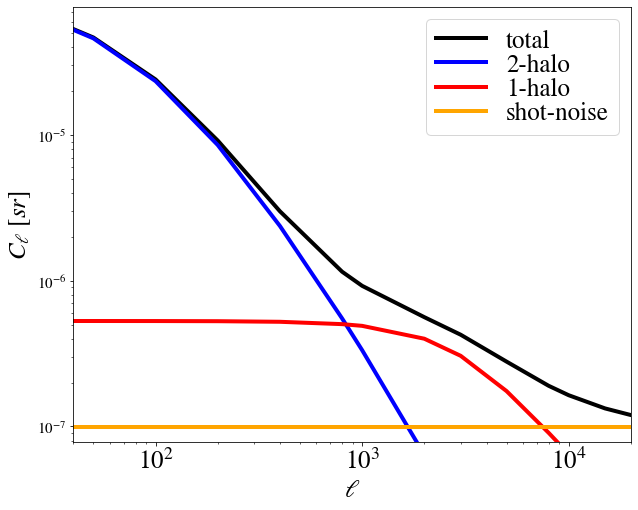

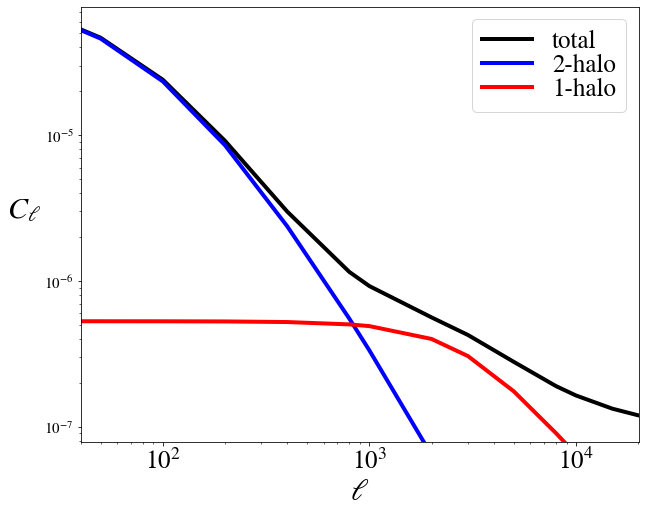

In [10]:
# Plot Clgal in a given bin
izsel = 5
print(z[izsel],z[izsel+1])
fig = plt.figure(figsize=(10,8))
plt.loglog(ell,Cl_tot_arr[:,izsel],color='black',label='total',lw=4)
plt.loglog(ell,Cl_2h_arr[:,izsel],color='blue',label='2-halo',lw=4)
plt.loglog(ell,Cl_1h_arr[:,izsel],color='red',label='1-halo',lw=4)
plt.loglog(ell,Cl_shot_arr[:,izsel],color='orange',label='shot-noise',lw=4)
#ax.xaxis.set_tick_params(labelsize=15)
#fig.yaxis.set_tick_params(labelsize=12)
plt.xlim([40,20100])
ymin=0.8*Cl_shot_arr[:,izsel].min() ; ymax=1.2*Cl_tot_arr[:,izsel].max()
plt.ylim([ymin,ymax])
plt.legend(labelspacing=0.0,fontsize=25,loc='upper right')
plt.ylabel('$C_\ell\  [sr]$',fontsize=25)
plt.xlabel('$\ell$',fontsize=25)
plt.xticks(fontsize=25) ; plt.yticks(fontsize=15)
plt.savefig(plotprefix+"_Clgal.png",bbox_inches='tight')
plt.show()

#same without shot-noise
fig = plt.figure(figsize=(10,8))
plt.loglog(ell,Cl_tot_arr[:,izsel],color='black',label='total',lw=4)
plt.loglog(ell,Cl_2h_arr[:,izsel],color='blue',label='2-halo',lw=4)
plt.loglog(ell,Cl_1h_arr[:,izsel],color='red',label='1-halo',lw=4)
plt.xlim([40,20100])
ymin=0.8*Cl_shot_arr[:,izsel].min() ; ymax=1.2*Cl_tot_arr[:,izsel].max()
plt.ylim([ymin,ymax])
plt.legend(labelspacing=0.0,fontsize=25,loc='upper right')
plt.ylabel('$C_\ell$',fontsize=30,rotation=0,labelpad=20)
plt.xlabel('$\ell$',fontsize=30)
plt.xticks(fontsize=25) ; plt.yticks(fontsize=15)
plt.show()

#Zoom to see where 2h crosses 1h
#plt.loglog(ell,Cl_2h_arr[:,izsel],color='blue',label='2-halo',lw=3)
#plt.loglog(ell,Cl_1h_arr[:,izsel],color='red',label='1-halo',lw=3)
#plt.xlim([1000,3000])
#plt.show()

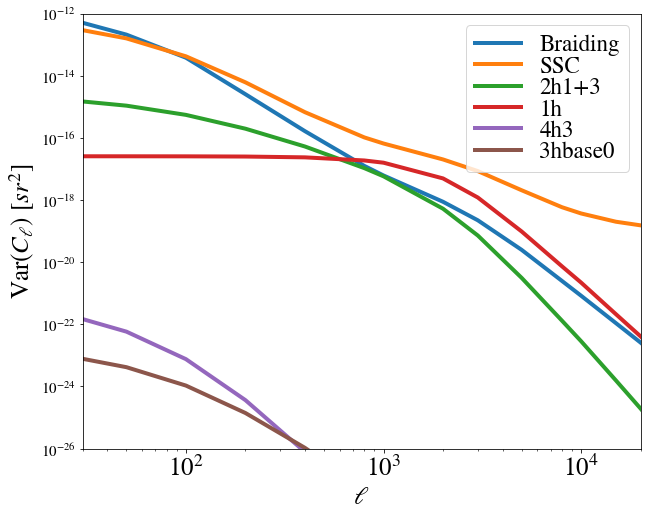

In [11]:
# Plot Var(Cl) until lmax=20000
Var_SSC     = np.diag(CovCl_SSC_arr[:,izsel,:,izsel])
Var_1h      = np.diag(CovCl_1h_arr[:,izsel,:,izsel])
Var_2h1p3   = np.diag(CovCl_2h1p3_arr[:,izsel,:,izsel])
Var_3hbase0 = np.diag(CovCl_3hbase0_arr[:,izsel,:,izsel])
Var_4h3rd   = np.diag(CovCl_4h3rd_arr[:,izsel,:,izsel])
Var_Braid   = np.diag(CovCl_Braid_arr[:,izsel,:,izsel])

fig = plt.figure(figsize=(10,8))
plt.plot(ell,Var_Braid,lw=4,label='Braiding')
plt.loglog(ell,Var_SSC,lw=4,label='SSC')
plt.plot(ell,Var_2h1p3,lw=4,label='2h1+3')
plt.plot(ell,Var_1h,lw=4,label='1h')
plt.plot(ell,Var_4h3rd,lw=4,label='4h3')
plt.plot(ell,Var_3hbase0,lw=4,label='3hbase0')
plt.xlim([30,20000]) ; plt.ylim([1e-26,1e-12])
plt.xlabel('$\ell$',fontsize=25) ; plt.ylabel('$\mathrm{Var}(C_\ell)\  [sr^2]$',fontsize=25)
plt.xticks(fontsize=25) ; plt.yticks(fontsize=15)
plt.legend(labelspacing=0.0,fontsize=23,loc='upper right')
plt.savefig(uuid+"_Var-Clgal.png",bbox_inches='tight')
plt.show()

<h1>Load binned Cl and covariance</h1>

In [12]:
#define bins
nbins        = 50
binstakes    = np.round(np.exp(np.linspace(np.log(lmin),np.log(lmax),num=nbins+1)))
binwidth     = binstakes[1:len(binstakes)] - binstakes[0:(len(binstakes)-1)]
lcenter      = np.sqrt(binstakes[0:(len(binstakes)-1)]*binstakes[1:len(binstakes)])
loglcenter   = np.log(lcenter)

il200    = np.where(abs(binstakes-200)==abs(binstakes-200).min())[0][0]
il500    = np.where(abs(binstakes-500)==abs(binstakes-500).min())[0][0]
il1000   = np.where(abs(binstakes-1000)==abs(binstakes-1000).min())[0][0]
il1200   = np.where(abs(binstakes-1200)==abs(binstakes-1200).min())[0][0]
il1500   = np.where(abs(binstakes-1500)==abs(binstakes-1500).min())[0][0]
il2000   = np.where(abs(binstakes-2000)==abs(binstakes-2000).min())[0][0]
il3000   = np.where(abs(binstakes-3000)==abs(binstakes-3000).min())[0][0]
il20000  = np.where(abs(binstakes-20000)==abs(binstakes-20000).min())[0][0]
il30000  = np.where(abs(binstakes-30000)==abs(binstakes-30000).min())[0][0]
iil20000 = il20000+1
il50000 = -1

In [13]:
#Load Cls from file
loadCl       = np.load(datfileprefix+"_Cl_binned_log_lmax50000.npz")
lcenter      = loadCl["lcenter"]
Cl_clust_bin = loadCl["Cl_clust_bin"]
Cl_tot_bin   = loadCl["Cl_tot_bin"]
#Load Full sky covariance from file
loadCovCl          = np.load(datfileprefix+"_CovCl_binned_log_lmax50000.npz")
CovCl_G_bin        = loadCovCl["CovCl_G_bin"]
CovCl_SSC_bin      = loadCovCl["CovCl_SSC_bin"]
CovCl_1h_bin       = loadCovCl["CovCl_1h_bin"]
CovCl_2h1p3_bin    = loadCovCl["CovCl_2h1p3_bin"]
CovCl_3hbase0_bin  = loadCovCl["CovCl_3hbase0_bin"]
CovCl_4h3rd_bin    = loadCovCl["CovCl_4h3rd_bin"]
CovCl_Braid_bin    = loadCovCl["CovCl_Braid_bin"]
CovCl_ONG_bin      = loadCovCl["CovCl_ONG_bin"]

In [14]:
#Scale covariance by sky fraction
CovCl_G_bin /= fsky ; CovCl_SSC_bin /= fsky
CovCl_1h_bin /= fsky ; CovCl_2h1p3_bin /= fsky
CovCl_3hbase0_bin /= fsky ; CovCl_4h3rd_bin /= fsky
CovCl_Braid_bin /= fsky ; CovCl_ONG_bin /= fsky
#Add up everything
CovCl_tot_bin = CovCl_G_bin + CovCl_SSC_bin + CovCl_ONG_bin

<h1>Plot Covariance</h1>

In [15]:
#Define labels and positions of ticks
lmin = lcenter[0] ; lmax20000 = lcenter[il20000-1]
indexes = np.arange(0, il20000+1, 4) ; positions = -0.5 + indexes; labels = np.asarray(lcenter[indexes], dtype=int)

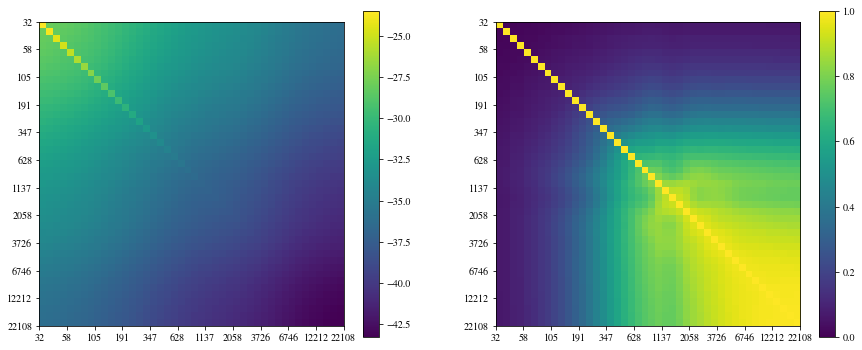

In [16]:
#Plot total covariance : G + SSC + ONG
fig, (ax1, ax2) = plt.subplots(figsize=(15,6), ncols=2)
#Cov with log color scale
im1 = ax1.imshow(np.log((CovCl_G_bin+CovCl_SSC_bin+CovCl_ONG_bin)[:il20000,izsel,:il20000,izsel]),interpolation='none')
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels)
#Correlation matrix
im2 = ax2.imshow(tooFab.NormalizeMatrix((CovCl_G_bin+CovCl_SSC_bin+CovCl_ONG_bin)[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
ax2.set_xticks(positions) ; ax2.set_xticklabels(labels) ; ax2.set_yticks(positions) ; ax2.set_yticklabels(labels)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
plt.savefig(plotprefix+"_Cov-Clgal_tot.png",bbox_inches='tight')
plt.show()

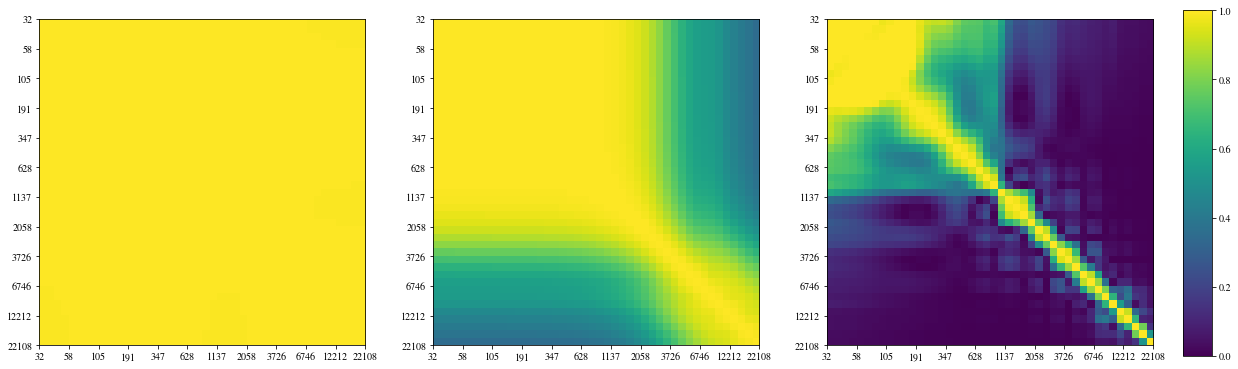

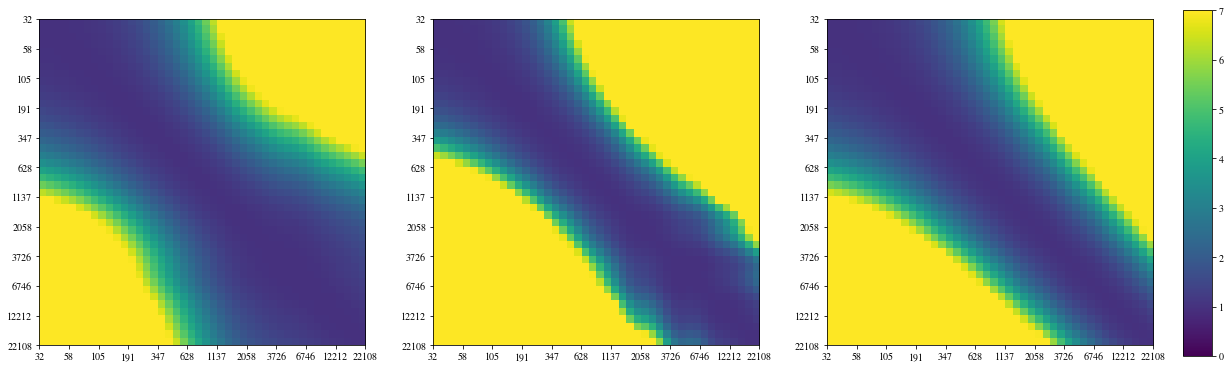

In [17]:
#Some correlation plots
#SSC, 1h and braiding
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3)
ax1.imshow(tooFab.NormalizeMatrix(CovCl_SSC_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels)
ax2.imshow(tooFab.NormalizeMatrix(CovCl_1h_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
ax2.set_xticks(positions) ; ax2.set_xticklabels(labels) ; ax2.set_yticks(positions) ; ax2.set_yticklabels(labels)
ax3.imshow(tooFab.NormalizeMatrix(abs(CovCl_Braid_bin)[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
ax3.set_xticks(positions) ; ax3.set_xticklabels(labels) ; ax3.set_yticks(positions) ; ax3.set_yticklabels(labels)
ax4 = fig.add_axes([0.92, 0.1, 0.02, 0.8])
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
matplotlib.colorbar.ColorbarBase(ax4,norm=norm)
#2h,3h,4h
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3)
ax1.imshow(tooFab.NormalizeMatrix(CovCl_2h1p3_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=7)
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels)
ax2.imshow(tooFab.NormalizeMatrix(CovCl_3hbase0_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=7)
ax2.set_xticks(positions) ; ax2.set_xticklabels(labels) ; ax2.set_yticks(positions) ; ax2.set_yticklabels(labels)
ax3.imshow(tooFab.NormalizeMatrix(CovCl_4h3rd_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=7)
ax3.set_xticks(positions) ; ax3.set_xticklabels(labels) ; ax3.set_yticks(positions) ; ax3.set_yticklabels(labels)
ax4 = fig.add_axes([0.92, 0.1, 0.02, 0.8])
norm = matplotlib.colors.Normalize(vmin=0, vmax=7)
matplotlib.colorbar.ColorbarBase(ax4,norm=norm)

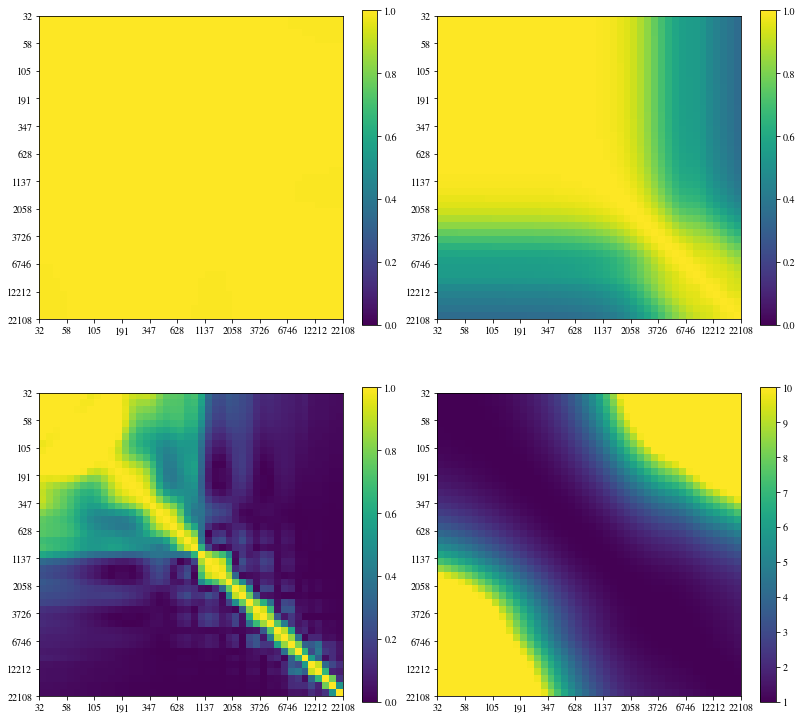

In [18]:
# Only most relevant terms:
# SSC, 1h, braiding and 2h1+3
fig, axes = plt.subplots(2,2,figsize=(12, 12))
fig.subplots_adjust(left=0.02, bottom=0.1, right=0.92, top=0.9, wspace=0.05)
im1 = axes[0,0].imshow(tooFab.NormalizeMatrix(CovCl_SSC_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
axes[0,0].set_xticks(positions) ; axes[0,0].set_xticklabels(labels) ; axes[0,0].set_yticks(positions) ; axes[0,0].set_yticklabels(labels)
im2 = axes[0,1].imshow(tooFab.NormalizeMatrix(CovCl_1h_bin[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
axes[0,1].set_xticks(positions) ; axes[0,1].set_xticklabels(labels) ; axes[0,1].set_yticks(positions) ; axes[0,1].set_yticklabels(labels)
im3 = axes[1,0].imshow(tooFab.NormalizeMatrix(abs(CovCl_Braid_bin)[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=0,vmax=1)
axes[1,0].set_xticks(positions) ; axes[1,0].set_xticklabels(labels) ; axes[1,0].set_yticks(positions) ; axes[1,0].set_yticklabels(labels)
im4 = axes[1,1].imshow(tooFab.NormalizeMatrix(abs(CovCl_2h1p3_bin)[:il20000,izsel,:il20000,izsel]),interpolation='none',vmin=1,vmax=10)
axes[1,1].set_xticks(positions) ; axes[1,1].set_xticklabels(labels) ; axes[1,1].set_yticks(positions) ; axes[1,1].set_yticklabels(labels)
fig.colorbar(im1, ax=axes[0, 0])
fig.colorbar(im2, ax=axes[0, 1])
fig.colorbar(im3, ax=axes[1, 0])
fig.colorbar(im4, ax=axes[1, 1])
plt.savefig(plotprefix+"_Corr-Clgal_SSC-1h-Braid-2h1p3.png",bbox_inches='tight')
plt.show()

<h1>Fisher matrix analysis</h1>

<h3>Read data files</h3>

In [19]:
#Name of model parameters
param_names       = ['HOD_alphasat','HOD_sigmalogM','HOD_Mratio','HODz_Mmin_a','HODz_Mmin_b','HODz_Mmin_c','HODz_Mmin_d','ombh2','omch2','hubble','sig8','ns','w0']
latex_param_names = [r'$\alpha_\mathrm{sat}$',r'$\sigma_{\log M}$',r'$M_{ratio}$','$M_{min}^a$','$M_{min}^b$','$M_{min}^c$','$M_{min}^d$','$\Omega_b h^2$','$\Omega_c h^2$','$h$','$\sigma_8$','$n_s$','$w_0$']
nparams           = len(param_names)
param_fidu_values = [1.,0.5,10.,11.0195,-0.143,0.549,-0.1048,0.022,0.12,67.,0.81,0.96,-1]
#Define index of some special parameters, for later use
ipa = 0 ; ipmmin = 3 ; ipObh2 = 7 ; ipOch2 = 8 ; iph = 9 ; ipsig8 = 10 ; ipns = 11 ; ipw = 12
ipminhod = 0 ; ipmaxhod = 6 ; ipmincosmo = 7 ; ipmaxcosmo = 12
nphod = ipmaxhod - ipminhod + 1 ; npcosmo = ipmaxcosmo - ipmincosmo + 1

<h3>Load dClbindparams from file</h3>

In [20]:
#Load dClbindparams from file
loaddCldp = np.load(datfileprefix+"_dCl_clust_bin_dparams.npz")
dCl_clust_bin_dparams = loaddCldp["dCl_clust_bin_dparams"]

<h3>Compute and plot Fisher matrices</h3>

<h4>Redshift by redshift, as function of lmax</h4>

In [21]:
t0=time.time()
Fisher_G_perz    = np.zeros((nparams,nparams,nbins,nz))
Fisher_wSSC_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_wONG_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_wS1h_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_tot_perz   = np.zeros((nparams,nparams,nbins,nz))
for iz in range(nz):
    for nbinmax in range(nbins):
        cGau = np.matrix(CovCl_G_bin[0:nbinmax,iz,0:nbinmax,iz])
        cSSC = np.matrix(CovCl_SSC_bin[0:nbinmax,iz,0:nbinmax,iz])
        cONG = np.matrix(CovCl_ONG_bin[0:nbinmax,iz,0:nbinmax,iz])
        c1h  = np.matrix(CovCl_1h_bin[0:nbinmax,iz,0:nbinmax,iz])
        icGau = np.linalg.inv(cGau)
        icwSSC = np.linalg.inv(cGau+cSSC)
        icwONG = np.linalg.inv(cGau+cONG)
        icwS1h = np.linalg.inv(cGau+cSSC+c1h)
        ictot  = np.linalg.inv(cGau+cSSC+cONG)
        for ip in range(nparams):
            dvec1 = np.matrix(dCl_clust_bin_dparams[ip,0:nbinmax,iz])
            for jp in range(nparams):
                dvec2 = np.matrix(dCl_clust_bin_dparams[jp,0:nbinmax,iz])
                Fisher_G_perz[ip,jp,nbinmax,iz]    = dvec1 * icGau  * dvec2.transpose()
                Fisher_wSSC_perz[ip,jp,nbinmax,iz] = dvec1 * icwSSC * dvec2.transpose()
                Fisher_wONG_perz[ip,jp,nbinmax,iz] = dvec1 * icwONG * dvec2.transpose()
                Fisher_wS1h_perz[ip,jp,nbinmax,iz] = dvec1 * icwS1h * dvec2.transpose()
                Fisher_tot_perz[ip,jp,nbinmax,iz]  = dvec1 * ictot * dvec2.transpose()
    print(iz+1,'/',nz,time.time()-t0)

1 / 10 0.7862355709075928
2 / 10 1.6349382400512695
3 / 10 2.540179491043091
4 / 10 3.4504470825195312
5 / 10 4.2412943840026855
6 / 10 5.028529644012451
7 / 10 5.7816455364227295
8 / 10 6.659472703933716
9 / 10 7.636753082275391
10 / 10 8.468998193740845


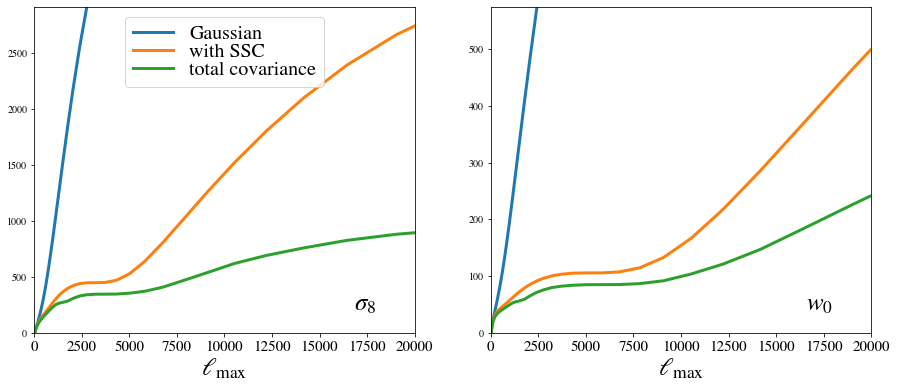

In [22]:
#Limited to ell<20,000 and to sigma_8 and w_0
fig = plt.figure(figsize=(15,6))
count=0
for ip in [ipsig8,ipw]:
    count+=1
    ax = plt.subplot(1,2,count)
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_G_perz[ip,ip,:il30000,izsel]),lw=3,label='Gaussian')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_wSSC_perz[ip,ip,:il30000,izsel]),lw=3,label='with SSC')
    #plt.plot(lcenter[:il30000],np.sqrt(Fisher_wONG_perz[ip,ip,:il30000,izsel]),lw=3,label='with ONG')
    #plt.plot(lcenter[:il30000],np.sqrt(Fisher_wS1h_perz[ip,ip,:il30000,izsel]),lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_tot_perz[ip,ip,:il30000,izsel]),lw=3,label='total covariance')
    plt.text(0.9, 0.05, latex_param_names[ip], fontsize=25, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
    plt.xlim([0,20000])
    plt.xlabel('$\ell_\mathrm{max}$',fontsize=25)
    plt.xticks(fontsize=15)
    ymin = 0 ; ymax = np.sqrt(Fisher_wSSC_perz[ip,ip,il20000,izsel])
    plt.ylim([ymin,ymax])
    if (ip==ipsig8):
        plt.legend(labelspacing=0.0,fontsize=20,loc='upper center')
plt.show()

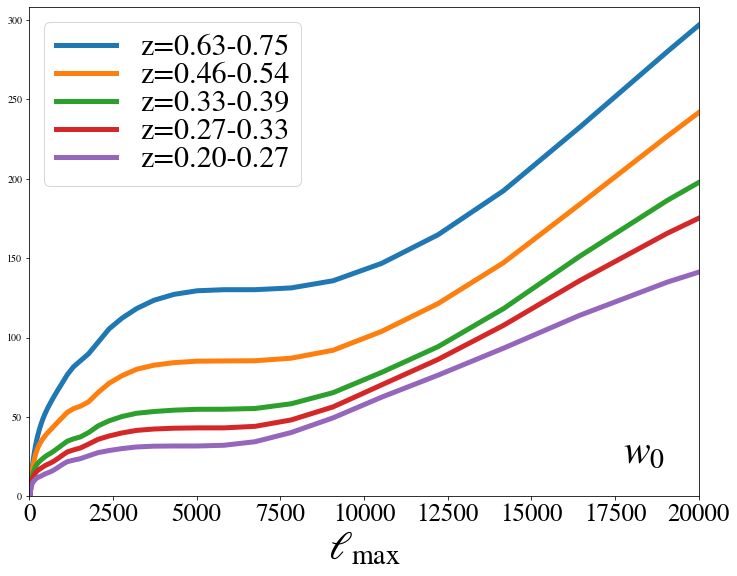

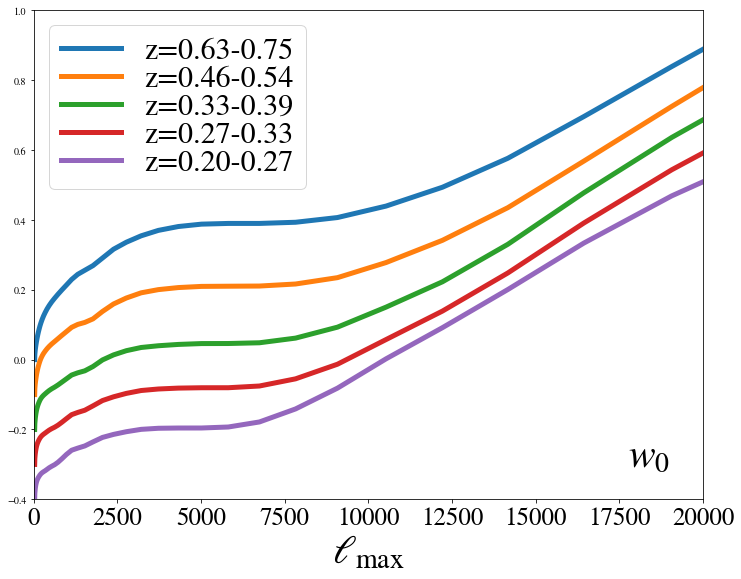

In [23]:
#Fisher of w at ell<20,000 for several redshift bins
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
for iz in [7,5,3,2,1]:
    label='z='+"{:3.2f}".format(z[iz])+"-"+"{:3.2f}".format(z[iz+1])
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_tot_perz[ipw,ipw,:il30000,iz]),lw=5,label=label)
plt.text(0.95, 0.05, latex_param_names[ipw], fontsize=40, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
plt.xlim([0,20000])
plt.xlabel('$\ell_\mathrm{max}$',fontsize=40)
plt.xticks(fontsize=25)
ymin= 0
#ymin = 0.8*np.sqrt(Fisher_tot_perz[ipw,ipw,il2000,:].min())
ymax = 1.1*np.sqrt(Fisher_tot_perz[ipw,ipw,il20000-1,7])
plt.ylim([ymin,ymax])
plt.legend(labelspacing=0.0,fontsize=30,loc='upper left')
plt.savefig(plotprefix+"_Fisher-perz-w.png",bbox_inches='tight')
plt.show()
#Same but artificially rescaled to be 1 at ell=2000, and offset, to see the shapes
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
c=0
for iz in [7,5,3,2,1]:
    label='z='+"{:3.2f}".format(z[iz])+"-"+"{:3.2f}".format(z[iz+1])
    plt.plot(lcenter[:il30000],-c/10.+np.sqrt(Fisher_tot_perz[ipw,ipw,:il30000,iz])/np.sqrt(Fisher_tot_perz[ipw,ipw,il20000,iz]),lw=5,label=label)
    c +=1
#plt.text(0.05, 0.9, latex_param_names[ipw], fontsize=40, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
plt.text(0.95, 0.05, latex_param_names[ipw], fontsize=40, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
plt.xlim([0,20000])
plt.xlabel('$\ell_\mathrm{max}$',fontsize=40)
plt.xticks(fontsize=25)
plt.ylim([-0.4,1.])
plt.legend(labelspacing=0.0,fontsize=30,loc='upper left')
plt.savefig(plotprefix+"_Fisher-perz-w-rescaledwoffset.png",bbox_inches='tight')
plt.show()

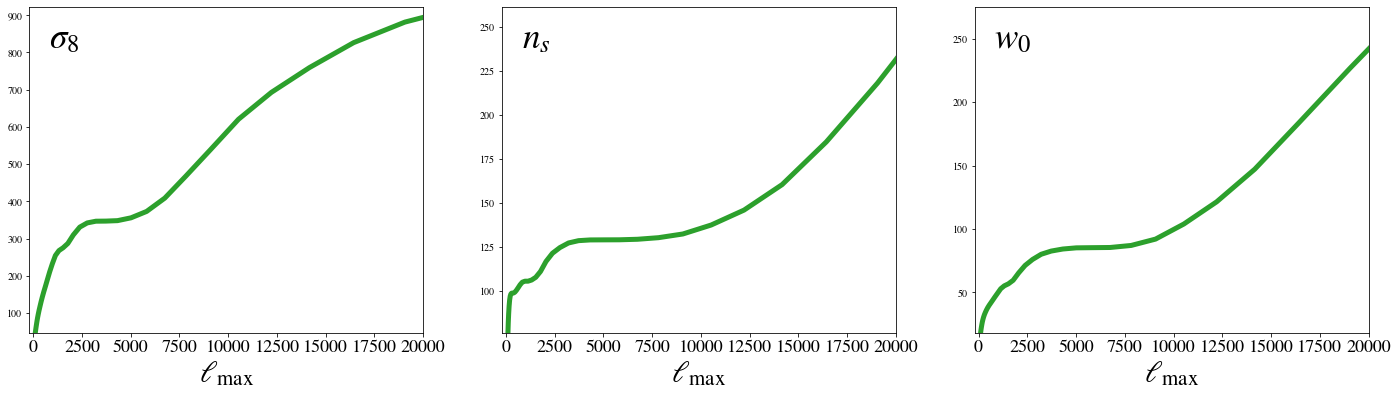

In [24]:
#For a particular redshift bin, for sigma_8, ns and w_0
fig = plt.figure(figsize=(24,6))
count=0
for ip in [ipsig8,ipns,ipw]:
    count+=1
    ax = plt.subplot(1,3,count)
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_tot_perz[ip,ip,:il30000,izsel]),lw=5,label='total covariance',color=t10_cmap(2))
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=35, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-200,20000])
    plt.xlabel('$\ell_\mathrm{max}$',fontsize=30)
    plt.xticks(fontsize=18)
    ymin = np.sqrt(Fisher_tot_perz[ip,ip,8,izsel]) ; ymax = np.sqrt(Fisher_tot_perz[ip,ip,il20000,izsel])
    plt.ylim([ymin,ymax])
plt.savefig(plotprefix+"_Fisher-izsel-sig8nsw.png",bbox_inches='tight')
plt.show()

<h3>All redshifts, as a function of lmax</h3>

In [25]:
# Flatten dCl/dp into a vector
# Required arrays
n_cl_bin_vec     = nbins*nz
ibins_vec        = np.zeros(n_cl_bin_vec,dtype=int)
iz_vec           = np.zeros(n_cl_bin_vec,dtype=int)
c=0
for il in range(nbins):
    for iz in range(nz):
        ibins_vec[c]        = il
        iz_vec[c]           = iz
        c+=1
# Make derivative into vector        
dCl_clust_bin_vec_dparams = np.zeros((nparams,nbins*nz))
for ip in range(nparams):
    dCl_clust_bin_vec_dparams[ip,:] = dCl_clust_bin_dparams[ip,ibins_vec,iz_vec]
# Now make binned covariance into matrix
CovCl_G_bin_vec   = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_SSC_bin_vec = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_ONG_bin_vec = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_1h_bin_vec  = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
for c1 in range(n_cl_bin_vec):
    il = ibins_vec[c1]
    iz = iz_vec[c1]
    for c2 in range(n_cl_bin_vec):
        jl = ibins_vec[c2]
        jz = iz_vec[c2]
        CovCl_G_bin_vec[c1,c2]   = CovCl_G_bin[il,iz,jl,jz]
        CovCl_SSC_bin_vec[c1,c2] = CovCl_SSC_bin[il,iz,jl,jz]
        CovCl_ONG_bin_vec[c1,c2] = CovCl_ONG_bin[il,iz,jl,jz]
        CovCl_1h_bin_vec[c1,c2]  = CovCl_1h_bin[il,iz,jl,jz]

In [26]:
#Compute Fisher matrix depending on lmax
Fisher_G_allz    = np.zeros((nparams,nparams,nbins))
Fisher_wSSC_allz = np.zeros((nparams,nparams,nbins))
Fisher_wONG_allz = np.zeros((nparams,nparams,nbins))
Fisher_wS1h_allz = np.zeros((nparams,nparams,nbins))
Fisher_tot_allz = np.zeros((nparams,nparams,nbins))
for nbinmax in range(nbins):
    wh   = np.where(ibins_vec <= nbinmax)[0]
    cGau = np.matrix(np.take(np.take(CovCl_G_bin_vec,wh,0),wh,1))
    cSSC = np.matrix(np.take(np.take(CovCl_SSC_bin_vec,wh,0),wh,1))
    cONG = np.matrix(np.take(np.take(CovCl_ONG_bin_vec,wh,0),wh,1))
    c1h  = np.matrix(np.take(np.take(CovCl_1h_bin_vec,wh,0),wh,1))
    icGau  = np.linalg.inv(cGau)
    icwSSC = np.linalg.inv(cGau+cSSC)
    icwONG = np.linalg.inv(cGau+cONG)
    icwS1h = np.linalg.inv(cGau+cSSC+c1h)
    ictot  = np.linalg.inv(cGau+cSSC+cONG)
    for ip in range(nparams):
        dvec1 = np.matrix(dCl_clust_bin_vec_dparams[ip,wh])
        for jp in range(nparams):
            dvec2                           = np.matrix(dCl_clust_bin_vec_dparams[jp,wh])
            Fisher_G_allz[ip,jp,nbinmax]    = dvec1 * icGau  * dvec2.transpose()
            Fisher_wSSC_allz[ip,jp,nbinmax] = dvec1 * icwSSC * dvec2.transpose()
            Fisher_wONG_allz[ip,jp,nbinmax] = dvec1 * icwONG * dvec2.transpose()
            Fisher_wS1h_allz[ip,jp,nbinmax] = dvec1 * icwS1h * dvec2.transpose()
            Fisher_tot_allz[ip,jp,nbinmax]  = dvec1 * ictot  * dvec2.transpose()

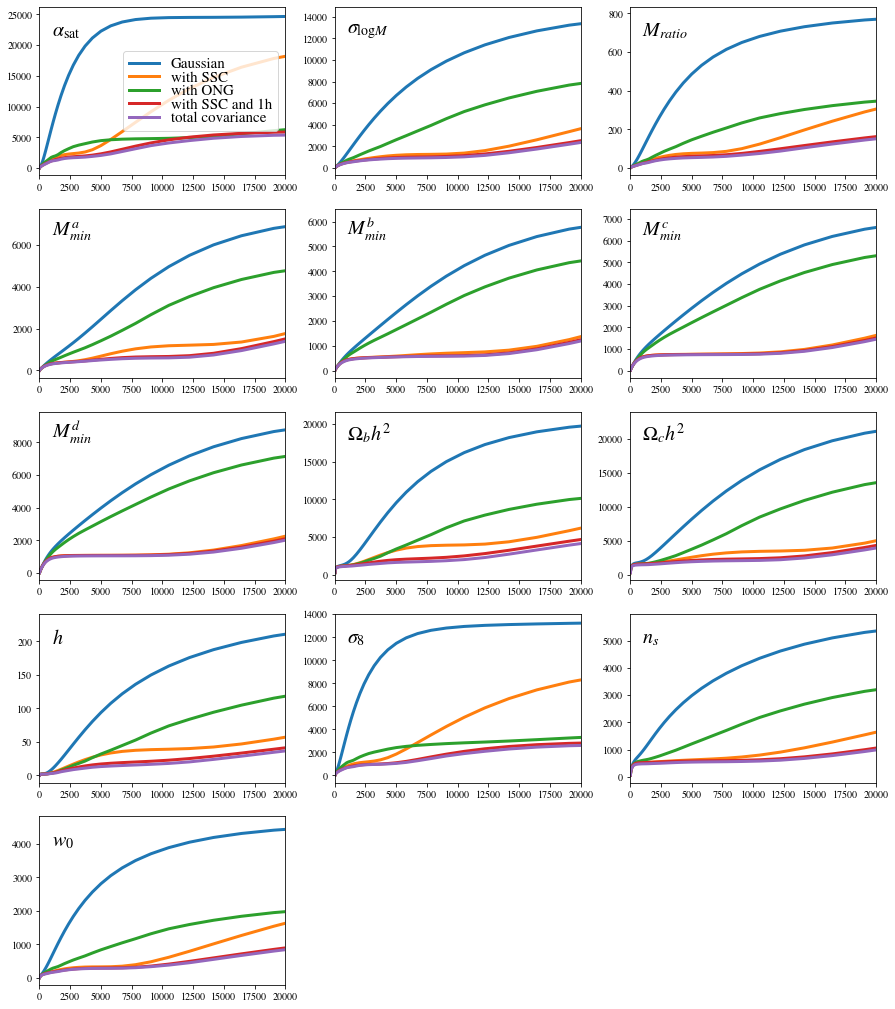

In [27]:
#Plot cumulative Fisher depending on max bin for all params
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_G_allz[ip,ip,:il30000]),lw=3,label='Gaussian')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_wSSC_allz[ip,ip,:il30000]),lw=3,label='with SSC')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_wONG_allz[ip,ip,:il30000]),lw=3,label='with ONG')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_wS1h_allz[ip,ip,:il30000]),lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_tot_allz[ip,ip,:il30000]),lw=3,label='total covariance')
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([0,20000])
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center right')
plt.show()

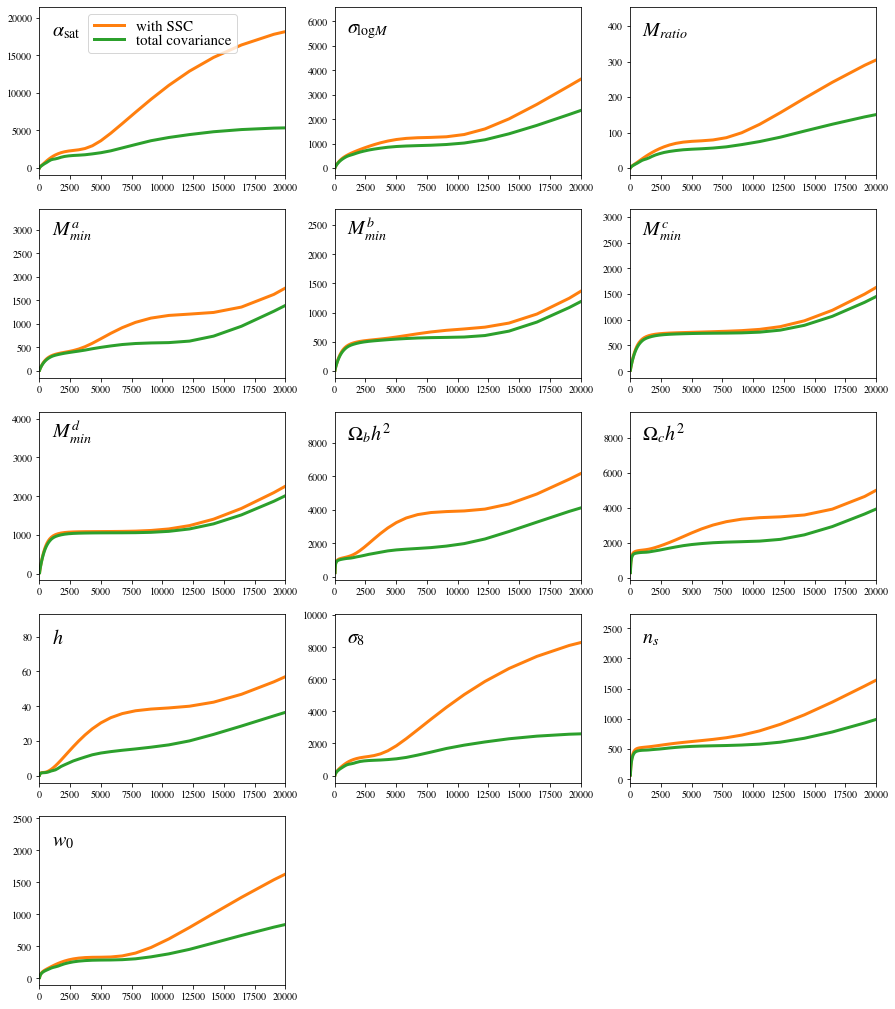

In [28]:
#Same but zoomed on NG curves
il30000 = np.where(abs(binstakes-30000)==abs(binstakes-30000).min())[0][0]
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_wSSC_allz[ip,ip,:il30000]),lw=3,label='with SSC',color=t10_cmap(1))
    plt.plot(lcenter[:il30000],np.sqrt(Fisher_tot_allz[ip,ip,:il30000]),lw=3,label='total covariance',color=t10_cmap(2))
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([0,20000])
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='upper center')
plt.show()

<h2>Fisher depending on kmax</h2>

<h3>Redshift by redshift</h3>

In [29]:
#Run CLASS for the considered cosmology
from classy import Class
#Cosmo params
H0      = param_fidu_values[iph] ; h = H0/100
ombh2   = param_fidu_values[ipObh2]
omega_b = ombh2 / h**2
omch2   = param_fidu_values[ipOch2]
omega_c = omch2 / h**2
ns      = param_fidu_values[ipns]
sigma8  = param_fidu_values[ipsig8]
w0      = param_fidu_values[ipw]
#Run CLASS
cosmo = Class()
dico_for_CLASS = {'omega_b':ombh2,'omega_cdm':omch2,'H0':H0,'n_s':ns,'sigma8':sigma8}
cosmo.set(dico_for_CLASS)
cosmo.compute()

In [30]:
#Use that to get the comoving distance at the center of each redshift bin
comov_dist_zcenter = (cosmo.z_of_r(zcenter))[0] #In Mpc
#Define a vector of kmax scale cuts
nkmax = nl
kmax_min = 0.1 ; kmax_max = 10 #In Mpc^-1
kmax = np.exp(np.linspace(np.log(kmax_min),np.log(kmax_max),num=nkmax,endpoint=True))
#Convert that into a cut in lmax depending on redshift
lmax_fromkmax = np.zeros((nkmax,nz))
for iz in range(nz):
    lmax_fromkmax[:,iz] = kmax * comov_dist_zcenter[iz]
#Find the corresponding index cut :
#multipole bin whose center is the closest to that lmax
index_lmax_fromkmax = np.zeros((nkmax,nz),dtype=int)
for ik in range(nkmax):
    for iz in range(nz):
        truc = abs(lcenter-lmax_fromkmax[ik,iz])
        index_lmax_fromkmax[ik,iz] = np.where(truc==truc.min())[0][0]

In [31]:
#Compute Fisher at each redshift
t0=time.time()
Fisher_G_perz_kmax    = np.zeros((nparams,nparams,nkmax,nz))
Fisher_wSSC_perz_kmax = np.zeros((nparams,nparams,nkmax,nz))
Fisher_wONG_perz_kmax = np.zeros((nparams,nparams,nkmax,nz))
Fisher_wS1h_perz_kmax = np.zeros((nparams,nparams,nkmax,nz))
Fisher_tot_perz_kmax  = np.zeros((nparams,nparams,nkmax,nz))
for iz in range(nz):
    for ik in range(nkmax):
        binmax = index_lmax_fromkmax[ik,iz]
        cGau   = np.matrix(CovCl_G_bin[0:binmax,iz,0:binmax,iz])
        cSSC   = np.matrix(CovCl_SSC_bin[0:binmax,iz,0:binmax,iz])
        cONG   = np.matrix(CovCl_ONG_bin[0:binmax,iz,0:binmax,iz])
        c1h    = np.matrix(CovCl_1h_bin[0:binmax,iz,0:binmax,iz])
        icGau  = np.linalg.inv(cGau)
        icwSSC = np.linalg.inv(cGau+cSSC)
        icwONG = np.linalg.inv(cGau+cONG)
        icwS1h = np.linalg.inv(cGau+cSSC+c1h)
        ictot  = np.linalg.inv(cGau+cSSC+cONG)
        for ip in range(nparams):
            dvec1 = np.matrix(dCl_clust_bin_dparams[ip,0:binmax,iz])
            for jp in range(nparams):
                dvec2 = np.matrix(dCl_clust_bin_dparams[jp,0:binmax,iz])
                Fisher_G_perz_kmax[ip,jp,ik,iz]    = dvec1 * icGau  * dvec2.transpose()
                Fisher_wSSC_perz_kmax[ip,jp,ik,iz] = dvec1 * icwSSC * dvec2.transpose()
                Fisher_wONG_perz_kmax[ip,jp,ik,iz] = dvec1 * icwONG * dvec2.transpose()
                Fisher_wS1h_perz_kmax[ip,jp,ik,iz] = dvec1 * icwS1h * dvec2.transpose()
                Fisher_tot_perz_kmax[ip,jp,ik,iz]  = dvec1 * ictot * dvec2.transpose()
print('Done',time.time()-t0)

Done 2.4268276691436768


<h4>Plot</h4>

Cosmo

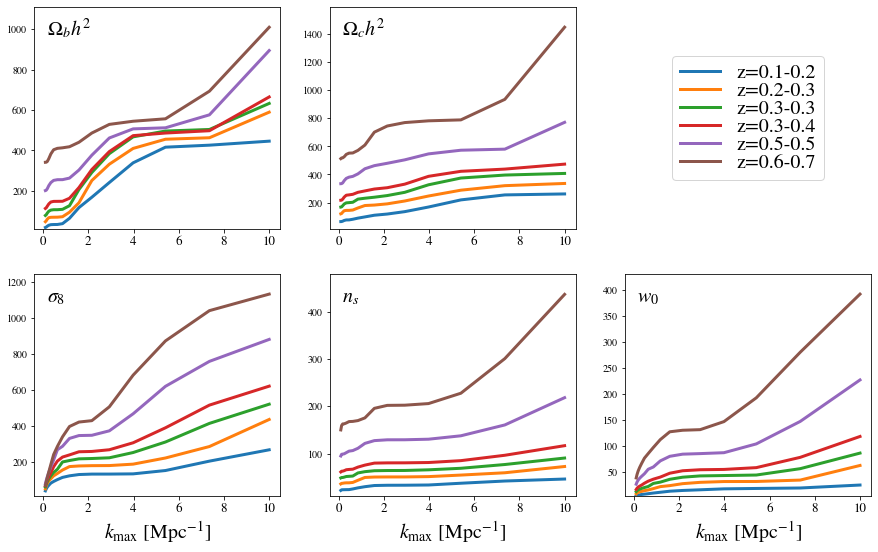

In [32]:
#Plot Fisher (unmarginalized error) for all cosmo parameters
fig = plt.figure(figsize=(15,9))
#Omega_b h2,Omega_c h2
for ip in [ipObh2,ipOch2]:
    ax = plt.subplot(2,3,ip-ipObh2+1)
    ymin = 10 ; ymax = 0
    for iz in [0,1,2,3,5,7]:
        label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
        plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]),lw=3,label=label)
        truc = 1.1*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).max()
        ymax = max(ymax,truc)
        truc = 0.9*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).min()
        ymin = min(ymin,truc)
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
#Shadow plot for legend
ax = plt.subplot(2,3,3)
for iz in [0,1,2,3,5,7]:
    label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
    plt.semilogx(kmax,0*kmax,lw=3,label=label)
plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=20,loc='center')
plt.axis('off')
#sig8,ns,w
for ip in [ipsig8,ipns,ipw]:
    ax = plt.subplot(2,3,ip-ipObh2+1)
    ymin = 10 ; ymax = 0
    for iz in [0,1,2,3,5,7]:
        label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
        plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]),lw=3,label=label)
        truc = 1.1*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).max()
        ymax = max(ymax,truc)
        truc = 0.9*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).min()
        ymin = min(ymin,truc)
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
#plt.savefig(plotprefix+"_Fisher-kmax-perz.png",bbox_inches='tight')
plt.show()

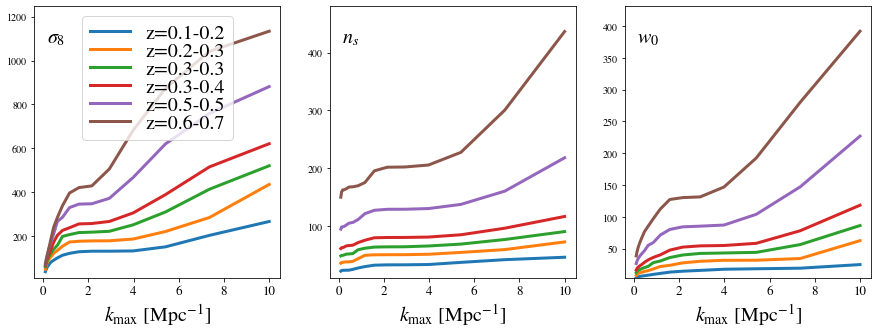

In [33]:
#Same but just sig8, ns, w
fig = plt.figure(figsize=(15,5))
#sig8,ns,w
for ip in [ipsig8,ipns,ipw]:
    ax = plt.subplot(1,3,ip-ipsig8+1)
    ymin = 10 ; ymax = 0
    for iz in [0,1,2,3,5,7]:
        label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
        plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]),lw=3,label=label)
        truc = 1.1*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).max()
        ymax = max(ymax,truc)
        truc = 0.9*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).min()
        ymin = min(ymin,truc)
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
    if ip==ipsig8:
        plt.legend(labelspacing=0.0,fontsize=20,loc='upper center')
plt.show()

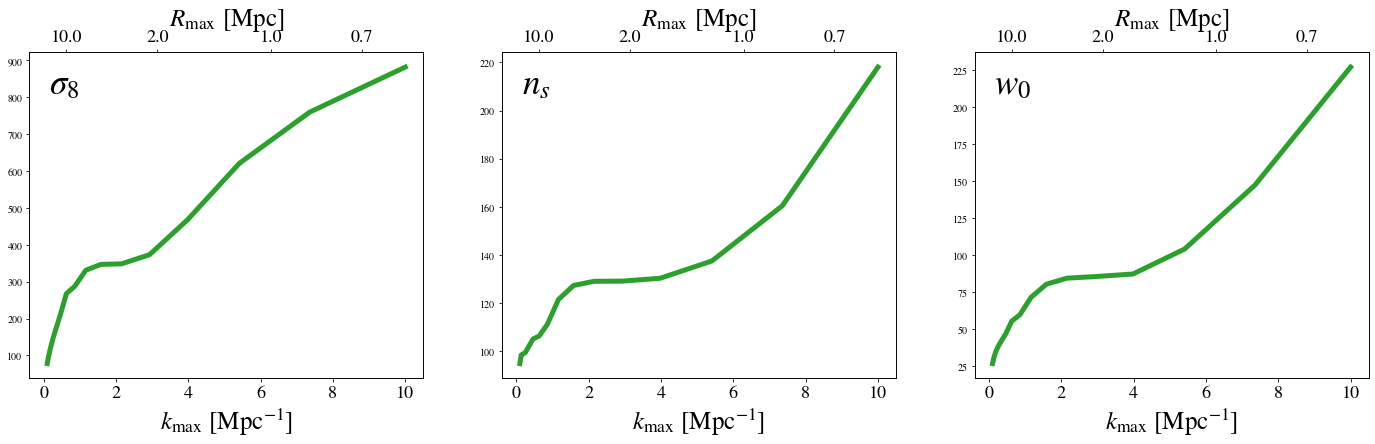

In [34]:
#One particular redshift bin, more readable
fig = plt.figure(figsize=(24,6))
count=0
for ip in [ipsig8,ipns,ipw]:
    count+=1
    ax = plt.subplot(1,3,count)
    plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,izsel]),lw=5,label='total covariance',color=t10_cmap(2))
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=35, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=25)
    plt.xticks(fontsize=18)
    #Upper x-axis : R=2pi/k
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim()) #; ax2.set_xscale('log')
    k_values = 2*pi*np.array([0.1,0.5,1,1.4]) ; R_values = 2*pi/k_values
    R_labels = ["{:2.1f}".format(R) for R in R_values]
    ax2.set_xticks(k_values,minor=False) #; ax2.set_xticklabels([10,2,1,0.5])
    ax2.set_xticklabels(R_labels)
    ax2.set_xlabel("$R_\mathrm{max}$ [Mpc]",fontsize=25) ; ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='x', which='minor',length=0,width=0)
    plt.xticks(fontsize=18)
plt.savefig(plotprefix+"_Fisher-kmax-izsel-sig8nsw.png",bbox_inches='tight')
plt.show()

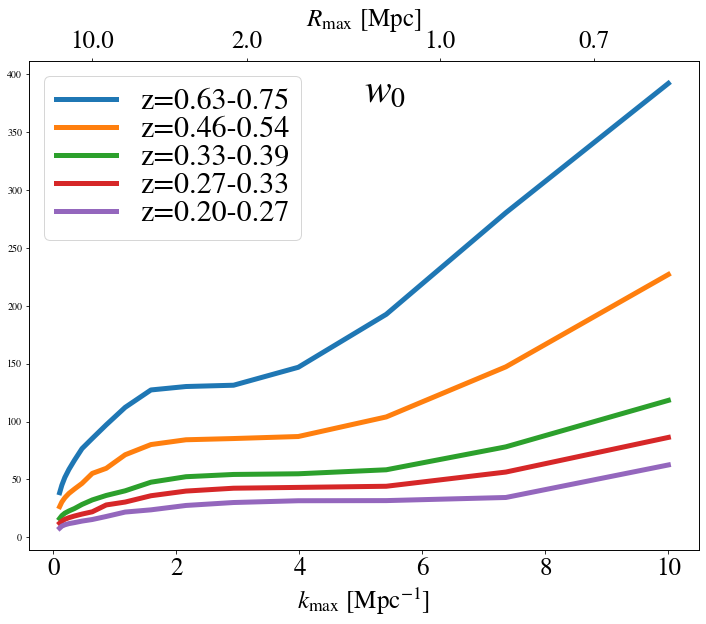

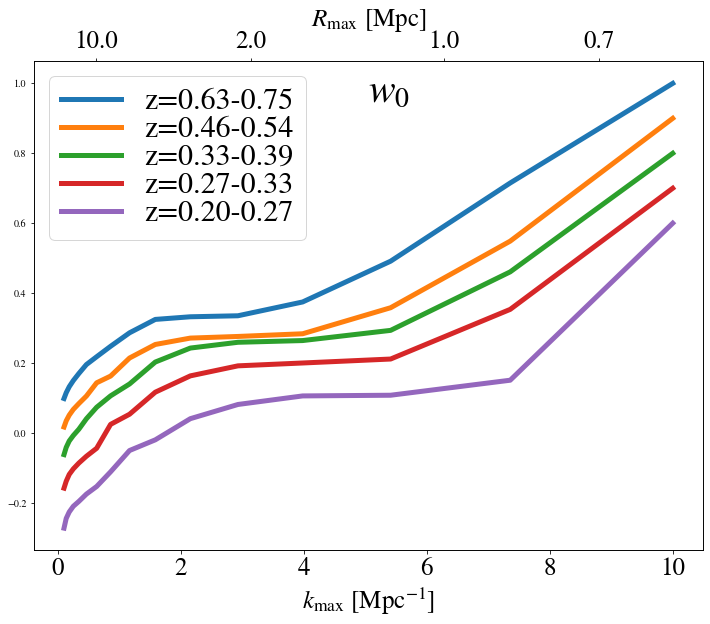

In [35]:
#Fisher of w for several redshift bins
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
for iz in [7,5,3,2,1]:
    label='z='+"{:3.2f}".format(z[iz])+"-"+"{:3.2f}".format(z[iz+1])
    plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ipw,ipw,:,iz]),lw=5,label=label)
plt.text(0.5, 0.9, latex_param_names[ipw], fontsize=40, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=25)
plt.xticks(fontsize=25)
plt.legend(labelspacing=0.0,fontsize=30,loc='upper left')
#Upper x-axis : R=2pi/k
ax2 = ax.twiny() ; ax2.set_xlim(ax.get_xlim())
k_values = 2*pi*np.array([0.1,0.5,1,1.4]) ; R_values = 2*pi/k_values ; R_labels = ["{:2.1f}".format(R) for R in R_values]
ax2.set_xticks(k_values,minor=False) ; ax2.set_xticklabels(R_labels)
ax2.set_xlabel("$R_\mathrm{max}$ [Mpc]",fontsize=25) ; ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', which='minor',length=0,width=0)
plt.xticks(fontsize=25)
plt.savefig(plotprefix+"_Fisher-kmax-perz-w.png",bbox_inches='tight')
plt.show()
#Same but artificially rescaled to be 1 at ell=2000
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
c=0
for iz in [7,5,3,2,1]:
    label='z='+"{:3.2f}".format(z[iz])+"-"+"{:3.2f}".format(z[iz+1])
    plt.plot(kmax,-c/10.+np.sqrt(Fisher_tot_perz_kmax[ipw,ipw,:,iz])/np.sqrt(Fisher_tot_perz_kmax[ipw,ipw,-1,iz]),lw=5,label=label)
    c +=1
plt.text(0.5, 0.9, latex_param_names[ipw], fontsize=40, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=25)
plt.xticks(fontsize=25)
plt.legend(labelspacing=0.0,fontsize=30,loc='upper left')
#Upper x-axis : R=2pi/k
ax2 = ax.twiny() ; ax2.set_xlim(ax.get_xlim())
k_values = 2*pi*np.array([0.1,0.5,1,1.4]) ; R_values = 2*pi/k_values ; R_labels = ["{:2.1f}".format(R) for R in R_values]
ax2.set_xticks(k_values,minor=False) ; ax2.set_xticklabels(R_labels)
ax2.set_xlabel("$R_\mathrm{max}$ [Mpc]",fontsize=25) ; ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', which='minor',length=0,width=0)
plt.xticks(fontsize=25)
plt.savefig(plotprefix+"_Fisher-kmax-perz-w-rescaledwoffset.png",bbox_inches='tight')
plt.show()

HOD

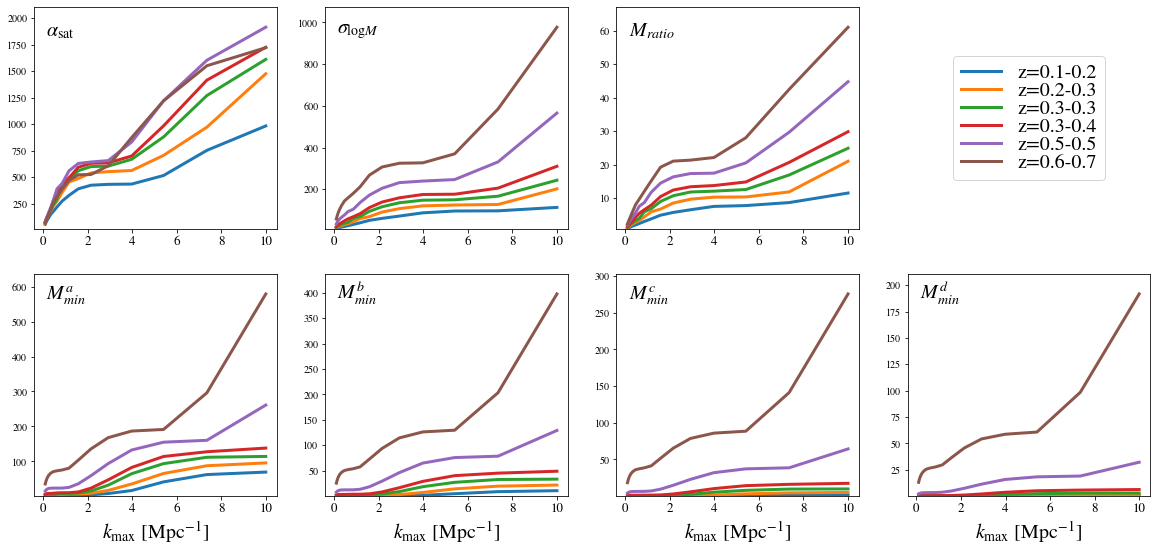

In [36]:
#Plot Fisher for all HOD parameters
fig = plt.figure(figsize=(20,9))
#alphasat, siglogM,Mratio
for ip in range(3):
    ax = plt.subplot(2,4,ip+1)
    ymin = 10 ; ymax = 0
    for iz in [0,1,2,3,5,7]:
        label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
        plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]),lw=3,label=label)
        truc = 1.1*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).max()
        ymax = max(ymax,truc)
        truc = 0.9*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).min()
        ymin = min(ymin,truc)
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
#Shadow plot for legend
ax = plt.subplot(2,4,4)
for iz in [0,1,2,3,5,7]:
    label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
    plt.semilogx(kmax,0*kmax,lw=3,label=label)
plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=20,loc='center')
plt.axis('off')
#Mmin_a,b,c,d
for ip in range(3,7):
    ax = plt.subplot(2,4,ip+2)
    ymin = 10 ; ymax = 0
    for iz in [0,1,2,3,5,7]:
        label='z='+"{:2.1f}".format(z[iz])+"-"+"{:2.1f}".format(z[iz+1])
        plt.plot(kmax,np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]),lw=3,label=label)
        truc = 1.1*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).max()
        ymax = max(ymax,truc)
        truc = 0.9*np.sqrt(Fisher_tot_perz_kmax[ip,ip,:,iz]).min()
        ymin = min(ymin,truc)
    plt.text(0.05, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
plt.show()

<h3>Summed over all redshifts</h3>

In [37]:
#Compute Fisher summed over all redshifts
t0=time.time()
Fisher_G_allz_kmax    = np.zeros((nparams,nparams,nkmax))
Fisher_wSSC_allz_kmax = np.zeros((nparams,nparams,nkmax))
Fisher_wONG_allz_kmax = np.zeros((nparams,nparams,nkmax))
Fisher_wS1h_allz_kmax = np.zeros((nparams,nparams,nkmax))
Fisher_tot_allz_kmax  = np.zeros((nparams,nparams,nkmax))
for ik in range(nkmax):
    #Build list of indices
    wh = []
    for iz in range(nz):
        boolean = ((ibins_vec <= index_lmax_fromkmax[ik,iz]) & (iz_vec == iz))
        whz = np.where(boolean)[0]
        wh = wh + list(whz)
    #print(wh)
    cGau   = np.matrix(np.take(np.take(CovCl_G_bin_vec,wh,0),wh,1))
    cSSC   = np.matrix(np.take(np.take(CovCl_SSC_bin_vec,wh,0),wh,1))
    cONG   = np.matrix(np.take(np.take(CovCl_ONG_bin_vec,wh,0),wh,1))
    c1h    = np.matrix(np.take(np.take(CovCl_1h_bin_vec,wh,0),wh,1))
    icGau  = np.linalg.inv(cGau)
    icwSSC = np.linalg.inv(cGau+cSSC)
    icwONG = np.linalg.inv(cGau+cONG)
    icwS1h = np.linalg.inv(cGau+cSSC+c1h)
    ictot  = np.linalg.inv(cGau+cSSC+cONG)
    for ip in range(nparams):
        dvec1 = np.matrix(dCl_clust_bin_vec_dparams[ip,wh])
        for jp in range(nparams):
            dvec2                           = np.matrix(dCl_clust_bin_vec_dparams[jp,wh])
            Fisher_G_allz_kmax[ip,jp,ik]    = dvec1 * icGau  * dvec2.transpose()
            Fisher_wSSC_allz_kmax[ip,jp,ik] = dvec1 * icwSSC * dvec2.transpose()
            Fisher_wONG_allz_kmax[ip,jp,ik] = dvec1 * icwONG * dvec2.transpose()
            Fisher_wS1h_allz_kmax[ip,jp,ik] = dvec1 * icwS1h * dvec2.transpose()
            Fisher_tot_allz_kmax[ip,jp,ik]  = dvec1 * ictot  * dvec2.transpose()
print('Done',time.time()-t0)

Done 1.7955148220062256


<h4>Cosmo</h4>

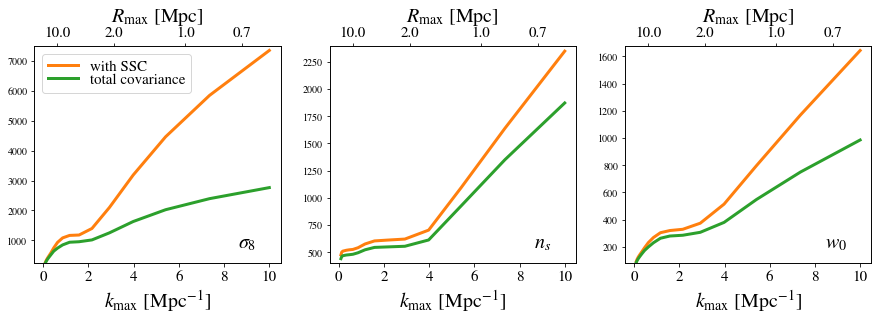

In [38]:
#Plot Fisher for sig8,ns,w 
fig = plt.figure(figsize=(15,4))
for ip in [ipsig8,ipns,ipw]:
    ax = plt.subplot(1,3,ip-ipsig8+1)
    ax.plot(kmax,np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]),lw=3,label='with SSC',color=t10_cmap(1))
    ax.plot(kmax,np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]),lw=3,label='total covariance',color=t10_cmap(2))
    ymin = 0.9*np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]).min()
    ymax = 1.02*np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]).max()
    plt.text(0.9, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=15)
    plt.ylim([ymin,ymax])
    #legend
    if ip==ipsig8:
        plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
    #Upper x-axis : R=2pi/k
    ax2 = ax.twiny() ; ax2.set_xlim(ax.get_xlim())
    k_values = 2*pi*np.array([0.1,0.5,1,1.4]) ; R_values = 2*pi/k_values ; R_labels = ["{:2.1f}".format(R) for R in R_values]
    ax2.set_xticks(k_values,minor=False) ; ax2.set_xticklabels(R_labels)
    ax2.set_xlabel("$R_\mathrm{max}$ [Mpc]",fontsize=20) ; ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='x', which='minor',length=0,width=0)
    plt.xticks(fontsize=15)
plt.savefig(plotprefix+"_Fisher-kmax-allz-sig8nsw.png",bbox_inches='tight')
plt.show()

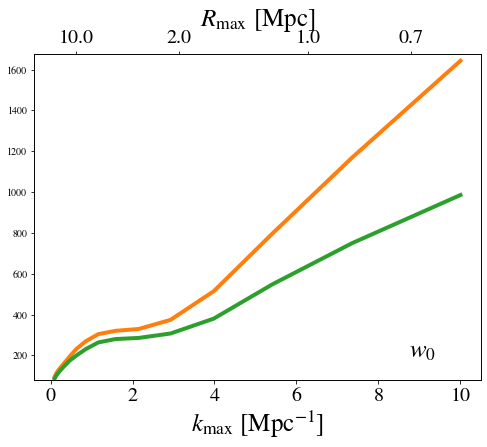

In [39]:
#Plot Fisher for w : SSC and tot
fig = plt.figure(figsize=(8,6))
for ip in [ipw]:
    ax = plt.subplot(1,1,ip-ipw+1)
    ax.plot(kmax,np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]),lw=4,label='with SSC',color=t10_cmap(1))
    ax.plot(kmax,np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]),lw=4,label='total covariance',color=t10_cmap(2))
    ymin = 0.9*np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]).min()
    ymax = 1.02*np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]).max()
    plt.text(0.9, 0.05, latex_param_names[ip], fontsize=25, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=25)
    plt.xticks(fontsize=20)
    plt.ylim([ymin,ymax])
    #Upper x-axis : R=2pi/k
    ax2 = ax.twiny() ; ax2.set_xlim(ax.get_xlim())
    k_values = 2*pi*np.array([0.1,0.5,1,1.4]) ; R_values = 2*pi/k_values ; R_labels = ["{:2.1f}".format(R) for R in R_values]
    ax2.set_xticks(k_values,minor=False) ; ax2.set_xticklabels(R_labels)
    ax2.set_xlabel("$R_\mathrm{max}$ [Mpc]",fontsize=25) ; ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='x', which='minor',length=0,width=0)
    plt.xticks(fontsize=20)
plt.savefig(plotprefix+"_Fisher-kmax-allz-w.png",bbox_inches='tight')
plt.show()

In [40]:
#Print some factors of improvements of the errors
#Raw
for ip in [ipsig8,ipns,ipw]:
    print(latex_param_names[ip])
    print(kmax[13],np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,13]/Fisher_tot_allz_kmax[ip,ip,13]))
    print(kmax[-1],np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,-1]/Fisher_tot_allz_kmax[ip,ip,-1]))
#Interpolated
for ip in [ipsig8,ipns,ipw]:
    raw_improv = np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]/Fisher_tot_allz_kmax[ip,ip,:])
    interp_improv = interp1d(kmax,raw_improv,kind='cubic')
    print(latex_param_names[ip],interp_improv(1),interp_improv(2),interp_improv(5),interp_improv(10))

$\sigma_8$
5.41169526546464 2.2038681216254825
10.000000000000002 2.658571420776826
$n_s$
5.41169526546464 1.180803166522922
10.000000000000002 1.2543459368426457
$w_0$
5.41169526546464 1.4538978672727019
10.000000000000002 1.667280147714368
$\sigma_8$ 1.2610831532070037 1.3242370128274012 2.1398171408856976 2.658571420776826
$n_s$ 1.0972406577590899 1.1131225421783806 1.1727351609074304 1.2543459368426457
$w_0$ 1.1603376599252462 1.1476355733228467 1.4322865192548462 1.6672801477143682


In [41]:
#Marginalise (i.e. invert Fisher) with and without h prior
#without h prior
iFisher_G_allz_kmax    = np.zeros((nparams,nparams,nkmax))
iFisher_wSSC_allz_kmax = np.zeros((nparams,nparams,nkmax))
iFisher_wONG_allz_kmax = np.zeros((nparams,nparams,nkmax))
iFisher_wS1h_allz_kmax = np.zeros((nparams,nparams,nkmax))
iFisher_tot_allz_kmax  = np.zeros((nparams,nparams,nkmax))
for ik in range(nkmax):
    iFisher_G_allz_kmax[:,:,ik]    = np.linalg.inv(Fisher_G_allz_kmax[:,:,ik])
    iFisher_wSSC_allz_kmax[:,:,ik] = np.linalg.inv(Fisher_wSSC_allz_kmax[:,:,ik])
    iFisher_wONG_allz_kmax[:,:,ik] = np.linalg.inv(Fisher_wONG_allz_kmax[:,:,ik])
    iFisher_wS1h_allz_kmax[:,:,ik] = np.linalg.inv(Fisher_wS1h_allz_kmax[:,:,ik])
    iFisher_tot_allz_kmax[:,:,ik]  = np.linalg.inv(Fisher_tot_allz_kmax[:,:,ik])

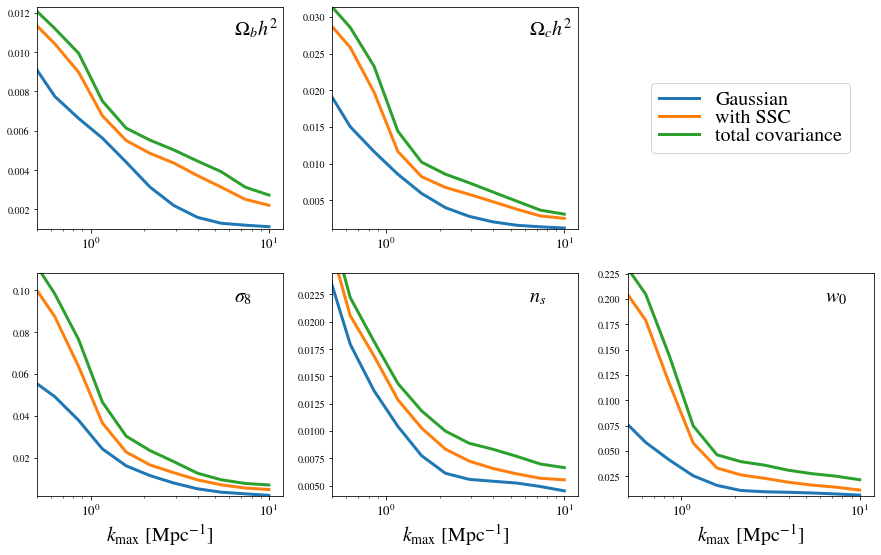

In [42]:
#Marginalized errors on cosmo
fig = plt.figure(figsize=(15,9))
#Omega_b h2,Omega_c h2
for ip in [ipObh2,ipOch2]:
    ax = plt.subplot(2,3,ip-ipmincosmo+1)
    plt.semilogx(kmax,np.sqrt(iFisher_G_allz_kmax[ip,ip,:]),lw=3,label='Gaussian')
    plt.semilogx(kmax,np.sqrt(iFisher_wSSC_allz_kmax[ip,ip,:]),lw=3,label='with SSC')
    plt.semilogx(kmax,np.sqrt(iFisher_tot_allz_kmax[ip,ip,:]),lw=3,label='total covariance')
    ymin = 0.9*np.sqrt(iFisher_G_allz_kmax[ip,ip,:]).min()
    ymax = 1.1*np.sqrt(iFisher_tot_allz_kmax[ip,ip,6])
    plt.text(0.8, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
    plt.xlim([0.5,12])
#Shadow plot for legend
ax = plt.subplot(2,3,3)
plt.semilogx(kmax,0*kmax,lw=3,label='Gaussian')
plt.semilogx(kmax,0*kmax,lw=3,label='with SSC')
plt.semilogx(kmax,0*kmax,lw=3,label='total covariance')
plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=20,loc='center')
plt.axis('off')
#sig8,ns,w
for ip in [ipsig8,ipns,ipw]:
    ax = plt.subplot(2,3,ip-ipObh2+1)
    plt.semilogx(kmax,np.sqrt(iFisher_G_allz_kmax[ip,ip,:]),lw=3,label='Gaussian')
    plt.semilogx(kmax,np.sqrt(iFisher_wSSC_allz_kmax[ip,ip,:]),lw=3,label='with SSC')
    plt.semilogx(kmax,np.sqrt(iFisher_tot_allz_kmax[ip,ip,:]),lw=3,label='total covariance')
    ymin = 0.9*np.sqrt(iFisher_G_allz_kmax[ip,ip,:]).min()
    ymax = 1.1*np.sqrt(iFisher_tot_allz_kmax[ip,ip,6])
    plt.text(0.8, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
    plt.xlim([0.5,12])
plt.show()

$\sigma_8$ 25.086415764490827 9.04892310989691
$n_s$ 35.951666153282495 2.4738517526450523
$w_0$ 10.882464136690631 5.176486454309064


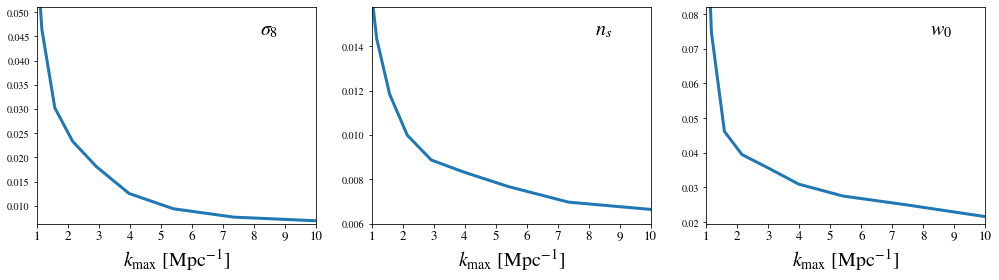

In [43]:
#Marginalized errors on sig8,ns,w 
fig = plt.figure(figsize=(17,4))
for ip in [ipsig8,ipns,ipw]:
    ax = plt.subplot(1,3,ip-ipsig8+1)
    plt.plot(kmax,np.sqrt(iFisher_tot_allz_kmax[ip,ip,:]),lw=3)
    ymin = 0.9*np.sqrt(iFisher_tot_allz_kmax[ip,ip,:]).min()
    ymax = 1.1*np.sqrt(iFisher_tot_allz_kmax[ip,ip,8]).max()
    plt.text(0.8, 0.85, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
    plt.xlim([1,10])
plt.savefig(plotprefix+"_marginalised_errors_sig8nsw.png",bbox_inches='tight')
#print factors of improvement
for ip in [ipsig8,ipns,ipw]:
    err_interp = interp1d(kmax,np.sqrt(iFisher_tot_allz_kmax[ip,ip,:]))
    print(latex_param_names[ip],err_interp(0.1001)/err_interp(1),err_interp(1)/err_interp(10))

<h4>HOD</h4>

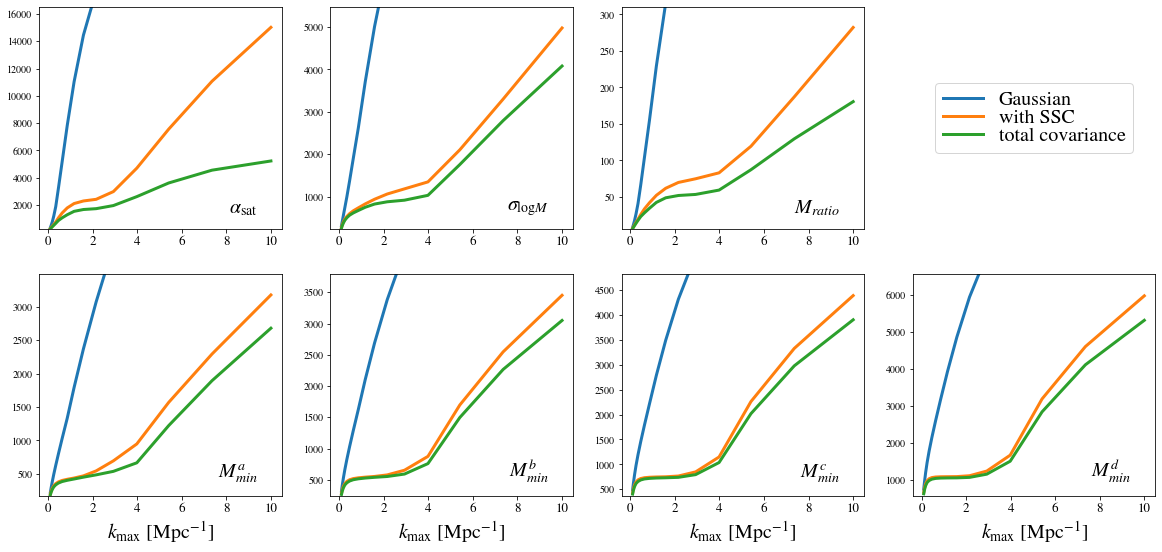

In [44]:
#Fisher, with zoom on y-axis to better see NG curves
fig = plt.figure(figsize=(20,9))
#alphasat, siglogM,Mratio
for ip in range(3):
    ax = plt.subplot(2,4,ip+1)
    plt.plot(kmax,np.sqrt(Fisher_G_allz_kmax[ip,ip,:]),lw=3,label='Gaussian')
    plt.plot(kmax,np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]),lw=3,label='with SSC')
    plt.plot(kmax,np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]),lw=3,label='total covariance')
    ymin = 0.9*np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]).min()
    ymax = 1.1*np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]).max()
    plt.text(0.9, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
#Shadow plot for legend
ax = plt.subplot(2,4,4)
plt.plot(kmax,0*kmax,lw=3,label='Gaussian')
plt.plot(kmax,0*kmax,lw=3,label='with SSC')
plt.plot(kmax,0*kmax,lw=3,label='total covariance')
plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=20,loc='center')
plt.axis('off')
#Mmin_a,b,c,d
for ip in range(3,7):
    ax = plt.subplot(2,4,ip+2)
    plt.plot(kmax,np.sqrt(Fisher_G_allz_kmax[ip,ip,:]),lw=3,label='Gaussian')
    plt.plot(kmax,np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]),lw=3,label='with SSC')
    plt.plot(kmax,np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]),lw=3,label='total covariance')
    ymin = 0.9*np.sqrt(Fisher_tot_allz_kmax[ip,ip,:]).min()
    ymax = 1.1*np.sqrt(Fisher_wSSC_allz_kmax[ip,ip,:]).max()
    plt.text(0.9, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes)
    plt.xlabel('$k_\mathrm{max}$ [Mpc$^{-1}$]',fontsize=20)
    plt.xticks(fontsize=13)
    plt.ylim([ymin,ymax])
plt.show()